In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"F:\DS\ASSIGNMENTS\Assignment - Clustering\Wine_clust (2).csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# KMeans Clustering

In [8]:
from sklearn.cluster import KMeans

In [9]:
WCSS = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans = kmeans.fit(data)
    WCSS.append(kmeans.inertia_)

C:\Users\Sreebala Ajith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sreebala Ajith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sreebala Ajith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sreebala Ajith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

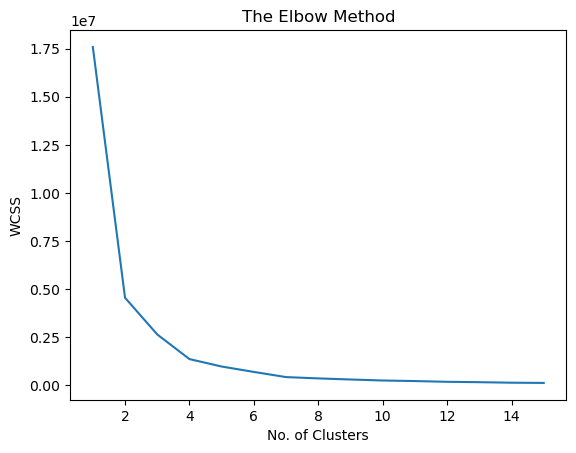

In [13]:
plt.plot(range(1,16),WCSS)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

C:\Users\Sreebala Ajith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
y_kmeans

array([1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3,
       1, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 3, 4, 0, 4, 4, 3,
       0, 0, 3, 3, 3, 4, 4, 1, 3, 4, 4, 0, 3, 4, 4, 3, 0, 0, 0, 4, 0, 0,
       3, 0, 0, 4, 0, 4, 4, 1, 0, 4, 3, 4, 3, 0, 4, 4, 3, 4, 0, 0, 4, 3,
       0, 4, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0, 4, 3,
       0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 4, 3, 3, 3, 3,
       3, 0])

In [16]:
from sklearn.metrics import silhouette_score
sil_kmeans = silhouette_score(data, y_kmeans)

In [17]:
sil_kmeans

0.5081797474674725

# AHC

In [18]:
data1 = pd.read_csv(r"F:\DS\ASSIGNMENTS\Assignment - Clustering\Wine_clust (2).csv")

In [19]:
import scipy.cluster.hierarchy as sch

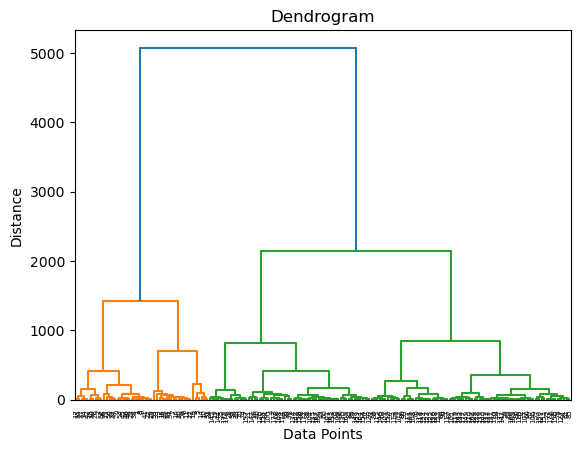

In [20]:
dg = sch.dendrogram(sch.linkage(data1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
ahc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_ahc = ahc.fit_predict(data1)

In [23]:
from sklearn.metrics import silhouette_score
sil_kmeans = silhouette_score(data1, y_ahc)

In [24]:
sil_kmeans

0.6587292996216912